# Define Library

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Check Data

In [3]:
# Descript data per features
def check_data(dfcek):
    list_item = []
    for col in dfcek.columns:
        list_item.append([col, dfcek[col].dtype, dfcek[col].isna().sum(), round(dfcek[col].isna().sum()*100/len(dfcek),2), dfcek[col].nunique(), dfcek[col].unique()[:4]])
    desc_dfcek = pd.DataFrame(data=list_item, columns='fitur tipe_data jumlah_null persentase_null jumlah_unique unique_sample'.split())
    return desc_dfcek

def check_vc(dfcek):
    for i in dfcek.columns.tolist():
        display(dfcek[i].value_counts())

In [4]:
df = pd.read_csv("gdrive/My Drive/Praktisi Mengajar/Universitas Negeri Surabaya/Data Mining/10. Clustering/Code/data/online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
check_data(df)

,fitur,tipe_data,jumlah_null,persentase_null,jumlah_unique,unique_sample
0,Invoice,object,0,0.00,53628,"[489434, 489435, 489436, 489437]"
1,StockCode,object,0,0.00,5305,"[85048, 79323P, 79323W, 22041]"
2,Description,object,4382,0.41,5698,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
3,Quantity,int64,0,0.00,1057,"[12, 48, 24, 10]"
4,InvoiceDate,object,0,0.00,47635,"[2009-12-01 07:45:00, 2009-12-01 07:46:00, 200..."
5,Price,float64,0,0.00,2807,"[6.95, 6.75, 2.1, 1.25]"
6,Customer ID,float64,243007,22.77,5942,"[13085.0, 13078.0, 15362.0, 18102.0]"
7,Country,object,0,0.00,43,"[United Kingdom, France, USA, Belgium]"


# Data Preprocessing

In [7]:
df = df[~df["Invoice"].str.contains("C", na = False)]
df = df.dropna().reset_index(drop=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDateTime'] = pd.to_timedelta([str(i.time()) for i in df['InvoiceDate']])
df['TotalPrice'] = df['Quantity'] * df['Price']
df = df[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'InvoiceDateTime',
       'Price', 'Customer ID', 'Country', 'TotalPrice']]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,InvoiceDateTime,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,0 days 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,0 days 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,0 days 12:50:00,2.10,12680.0,France,12.60
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,0 days 12:50:00,4.15,12680.0,France,16.60
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,0 days 12:50:00,4.15,12680.0,France,16.60
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,0 days 12:50:00,4.95,12680.0,France,14.85


In [8]:
check_data(df)

,fitur,tipe_data,jumlah_null,persentase_null,jumlah_unique,unique_sample
0,Invoice,object,0,0.0,36975,"[489434, 489435, 489436, 489437]"
1,StockCode,object,0,0.0,4631,"[85048, 79323P, 79323W, 22041]"
2,Description,object,0,0.0,5283,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
3,Quantity,int64,0,0.0,438,"[12, 48, 24, 10]"
4,InvoiceDate,datetime64[ns],0,0.0,34591,"[2009-12-01 07:45:00, 2009-12-01 07:46:00, 200..."
5,InvoiceDateTime,timedelta64[ns],0,0.0,775,"[0 days 07:45:00, 0 days 07:46:00, 0 days 09:0..."
6,Price,float64,0,0.0,666,"[6.95, 6.75, 2.1, 1.25]"
7,Customer ID,float64,0,0.0,5881,"[13085.0, 13078.0, 15362.0, 18102.0]"
8,Country,object,0,0.0,41,"[United Kingdom, France, USA, Belgium]"
9,TotalPrice,float64,0,0.0,3920,"[83.4, 81.0, 100.80000000000001, 30.0]"


# Exploratory Data Analysis (EDA)

In [9]:
print('Awal Waktu Data:', df['InvoiceDate'].min())
print('Akhir Waktu Data:', df['InvoiceDate'].max())
print('Jumlah Customer:',df['Customer ID'].nunique())
print('Total Frekuensi Transaksi:',df['Invoice'].nunique())
print('Total Nominal Transaksi (Omset):',int(df['TotalPrice'].sum()))

Awal Waktu Data: 2009-12-01 07:45:00
Akhir Waktu Data: 2011-12-09 12:50:00
Jumlah Customer: 5881
Total Frekuensi Transaksi: 36975
Total Nominal Transaksi (Omset): 17743429


In [10]:
df['month_year_number'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['month_year'] = df['InvoiceDate'].dt.strftime('%B %Y')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,InvoiceDateTime,Price,Customer ID,Country,TotalPrice,month_year_number,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12,December 2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,December 2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,0 days 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,December 2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,0 days 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12,December 2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,0 days 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12,December 2009
...,...,...,...,...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,0 days 12:50:00,2.10,12680.0,France,12.60,2011-12,December 2011
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,0 days 12:50:00,4.15,12680.0,France,16.60,2011-12,December 2011
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,0 days 12:50:00,4.15,12680.0,France,16.60,2011-12,December 2011
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,0 days 12:50:00,4.95,12680.0,France,14.85,2011-12,December 2011


In [11]:
df_gb_my = df.groupby(['month_year_number','month_year'], as_index=False).agg({'Customer ID':'nunique','Invoice':'nunique','TotalPrice':'sum'})
df_gb_my = df_gb_my.rename(columns={'Customer ID':'count_customer','Invoice':'frequency_trx','TotalPrice':'amount_trx'})
df_gb_my

,month_year_number,month_year,count_customer,frequency_trx,amount_trx
0,2009-12,December 2009,955,1512,686654.160
1,2010-01,January 2010,720,1011,557319.062
2,2010-02,February 2010,774,1106,506371.066
3,2010-03,March 2010,1057,1524,699608.991
4,2010-04,April 2010,942,1329,594609.192
5,2010-05,May 2010,966,1377,599985.790
6,2010-06,June 2010,1041,1497,639066.580
7,2010-07,July 2010,928,1381,591636.740
8,2010-08,August 2010,911,1293,604242.650
9,2010-09,September 2010,1145,1689,831615.001


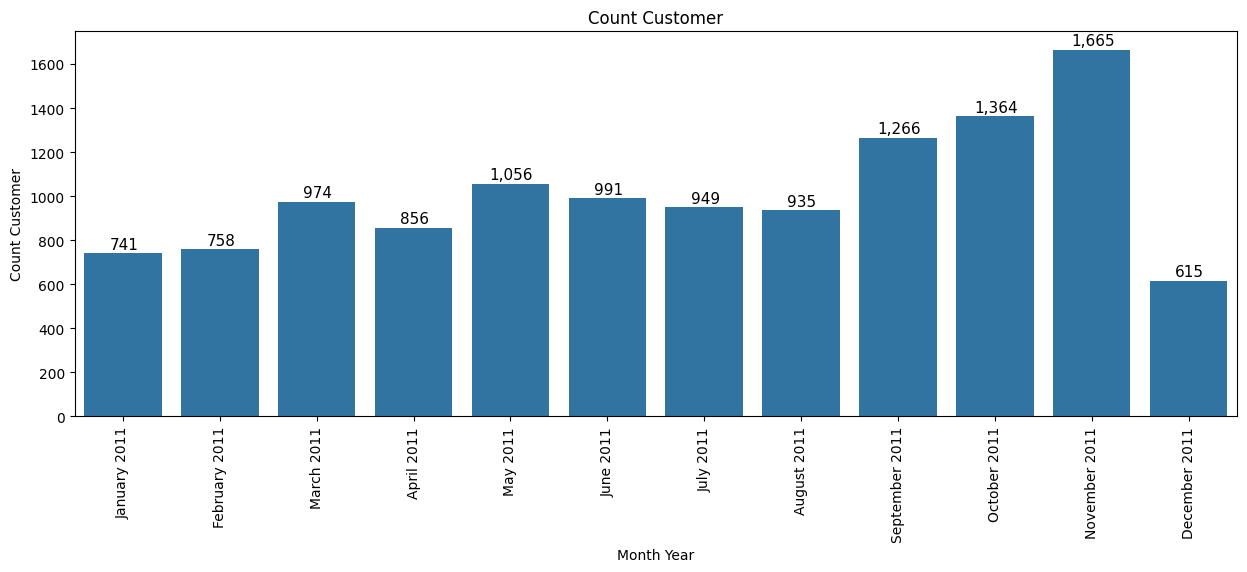

In [12]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='month_year', y='count_customer', data=df_gb_my[df_gb_my['month_year'].str.contains('2011')])
plt.title('Count Customer')
plt.xlabel('Month Year')
plt.ylabel('Count Customer')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x()+0.41, p.get_height()+20), ha="center", fontsize=11)

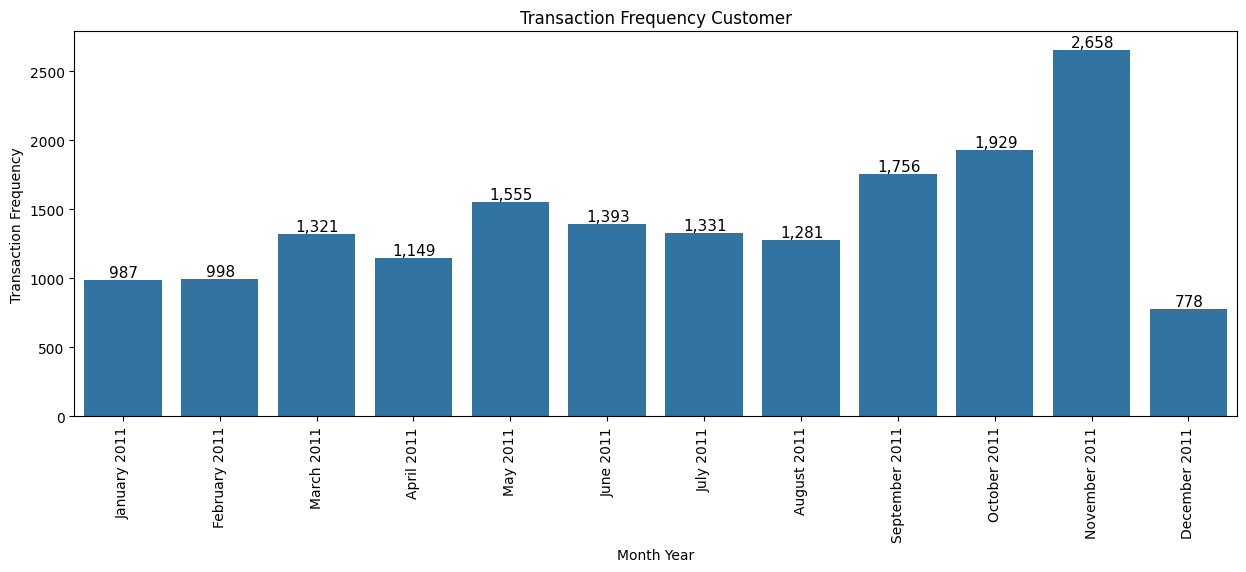

In [13]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='month_year', y='frequency_trx', data=df_gb_my[df_gb_my['month_year'].str.contains('2011')])
plt.title('Transaction Frequency Customer')
plt.xlabel('Month Year')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x()+0.41, p.get_height()+20), ha="center", fontsize=11)

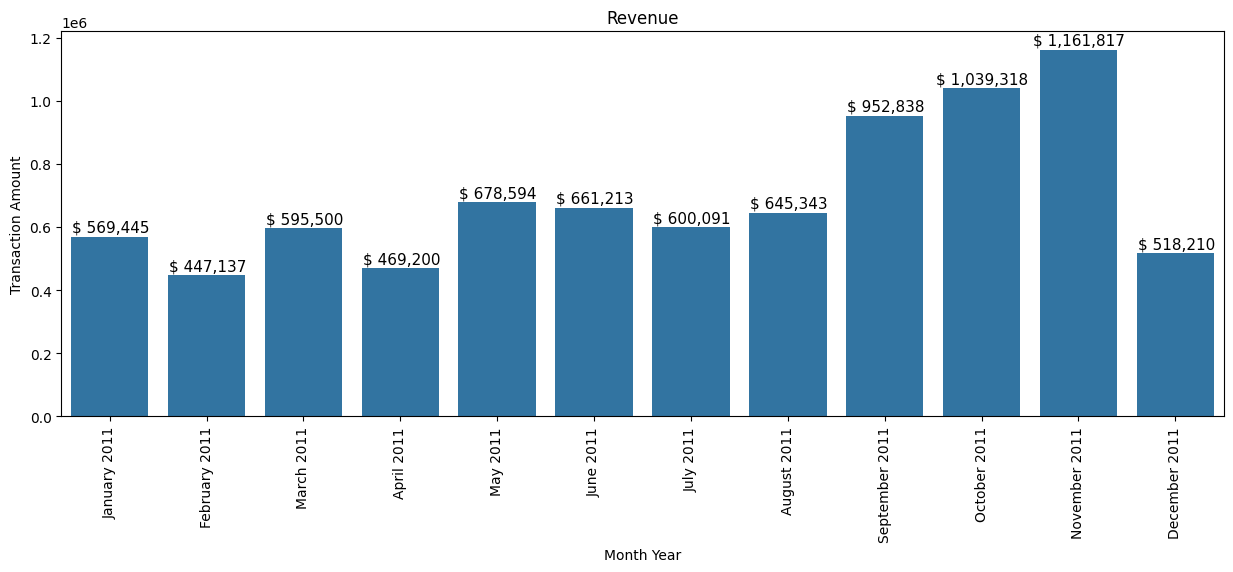

In [14]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='month_year', y='amount_trx', data=df_gb_my[df_gb_my['month_year'].str.contains('2011')])
plt.title('Revenue')
plt.xlabel('Month Year')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('$ {:,}'.format(int(p.get_height())), (p.get_x()+0.41, p.get_height()+15000), ha="center", fontsize=11)

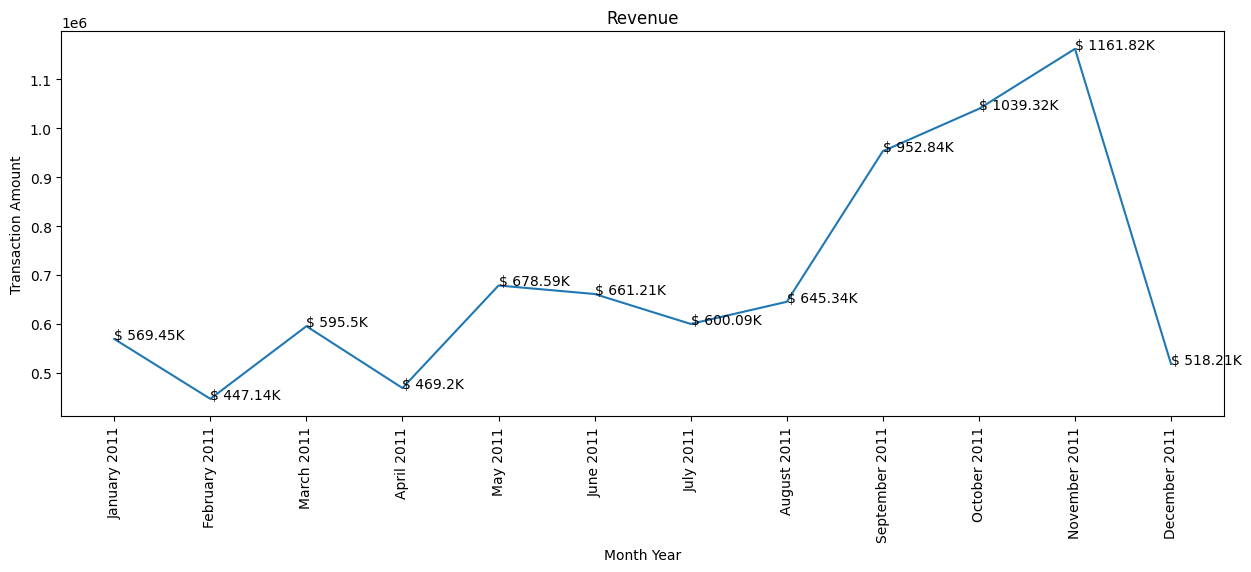

In [15]:
plt.figure(figsize=(15,5))
data = df_gb_my[df_gb_my['month_year'].str.contains('2011')].reset_index(drop=True)
x = data['month_year']
y = data['amount_trx']
plt.plot(x, y)
for i in range(len(y)):
    plt.text(x[i], y[i], f'$ {round((y[i]/1000),2)}K')
plt.title('Revenue')
plt.xlabel('Month Year')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=90)
plt.show()

In [16]:
df_gb_time = df.groupby(['month_year_number','month_year'], as_index=False).agg({'InvoiceDateTime':'mean'})
df_gb_time = df_gb_time.rename(columns={'InvoiceDateTime':'avg_time_purchase'})
df_gb_time['avg_time_purchase'] = [str(i).split()[-1].split('.')[0] for i in df_gb_time['avg_time_purchase']]
df_gb_time = df_gb_time[['month_year','avg_time_purchase']]
df_gb_time

,month_year,avg_time_purchase
0,December 2009,13:35:27
1,January 2010,13:20:17
2,February 2010,13:18:23
3,March 2010,13:13:11
4,April 2010,13:19:48
5,May 2010,13:15:31
6,June 2010,13:05:13
7,July 2010,13:18:15
8,August 2010,13:30:09
9,September 2010,13:28:02


# RFM Analysis

## Recency

In [17]:
today_date = df['InvoiceDate'].max() + timedelta(days=1)
print('Today Date:',today_date)
df_recency = (today_date - df.groupby(['Customer ID']).agg({'InvoiceDate':'max'}))
df_recency = df_recency.rename(columns={'InvoiceDate':'recency'})
df_recency = df_recency['recency'].apply(lambda x: x.days).to_frame().reset_index()
df_recency

Today Date: 2011-12-10 12:50:00


,Customer ID,recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
5876,18283.0,4
5877,18284.0,432
5878,18285.0,661
5879,18286.0,477


,pctl_num,pctl_val
0,0,1.0
1,1,1.0
2,2,2.0
3,3,2.0
4,4,3.0
...,...,...
96,96,645.0
97,97,667.0
98,98,684.0
99,99,726.0


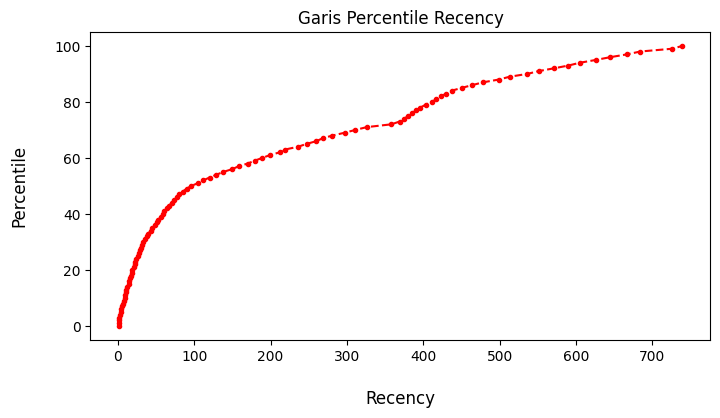

In [18]:
pctl_num = [i for i in range(101)]
pctl_val = []
for i in pctl_num:
    pctl_val.append(np.percentile(df_recency['recency'],i))
df_pctl = pd.DataFrame({'pctl_num':pctl_num, 'pctl_val':pctl_val})
display(df_pctl)

plt.figure(figsize=(8,4))
plt.title('Garis Percentile Recency')
plt.xlabel('\nRecency', fontsize=12)
plt.ylabel('Percentile\n', fontsize=12)
plt.plot(df_pctl['pctl_val'], df_pctl.index, 'r.--')
plt.show()

## Frequency

In [19]:
df_freq = df.groupby(['Customer ID'], as_index=False).agg({'Invoice':'nunique'})
df_freq = df_freq.rename(columns={'Invoice':'frequency'})
df_freq

,Customer ID,frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1
...,...,...
5876,18283.0,22
5877,18284.0,1
5878,18285.0,1
5879,18286.0,2


,pctl_num,pctl_val
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
96,96,24.0
97,97,28.0
98,98,34.0
99,99,46.0


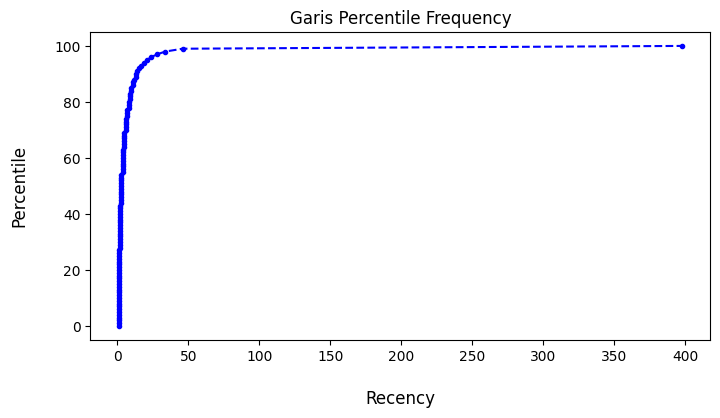

In [20]:
pctl_num = [i for i in range(101)]
pctl_val = []
for i in pctl_num:
    pctl_val.append(np.percentile(df_freq['frequency'],i))
df_pctl = pd.DataFrame({'pctl_num':pctl_num, 'pctl_val':pctl_val})
display(df_pctl)

plt.figure(figsize=(8,4))
plt.title('Garis Percentile Frequency')
plt.xlabel('\nRecency', fontsize=12)
plt.ylabel('Percentile\n', fontsize=12)
plt.plot(df_pctl['pctl_val'], df_pctl.index, 'b.--')
plt.show()

## Monetary

In [21]:
df_mon = df.groupby(['Customer ID'], as_index=False).agg({'TotalPrice':'sum'})
df_mon = df_mon.rename(columns={'TotalPrice':'monetary'})
df_mon

,Customer ID,monetary
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40
...,...,...
5876,18283.0,2736.65
5877,18284.0,461.68
5878,18285.0,427.00
5879,18286.0,1296.43


,pctl_num,pctl_val
0,0,0.000
1,1,45.014
2,2,71.400
3,3,90.000
4,4,105.512
...,...,...
96,96,11270.758
97,97,13646.616
98,98,17534.784
99,99,29704.598


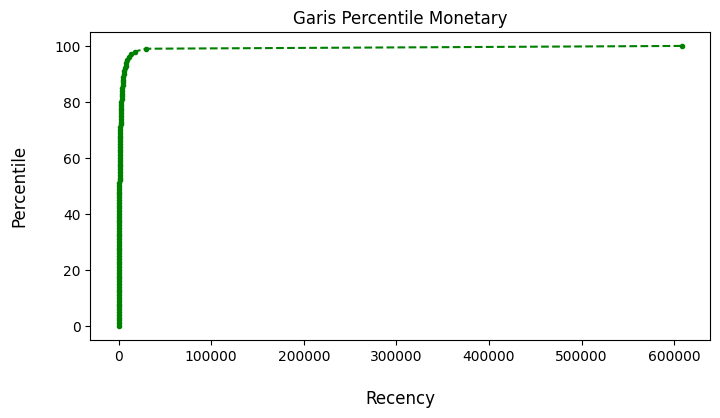

In [22]:
pctl_num = [i for i in range(101)]
pctl_val = []
for i in pctl_num:
    pctl_val.append(np.percentile(df_mon['monetary'],i))
df_pctl = pd.DataFrame({'pctl_num':pctl_num, 'pctl_val':pctl_val})
display(df_pctl)

plt.figure(figsize=(8,4))
plt.title('Garis Percentile Monetary')
plt.xlabel('\nRecency', fontsize=12)
plt.ylabel('Percentile\n', fontsize=12)
plt.plot(df_pctl['pctl_val'], df_pctl.index, 'g.--')
plt.show()

## Concat RFM

In [23]:
df_rfm = pd.concat([df_recency, df_freq[['frequency']], df_mon[['monetary']]], axis=1)
df_rfm

,Customer ID,recency,frequency,monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40
...,...,...,...,...
5876,18283.0,4,22,2736.65
5877,18284.0,432,1,461.68
5878,18285.0,661,1,427.00
5879,18286.0,477,2,1296.43


<ipython-input-24-e0f0d39230b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='recency', data=df_rfm, palette=['red'])
<ipython-input-24-e0f0d39230b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='frequency', data=df_rfm, palette=['blue'])
<ipython-input-24-e0f0d39230b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='monetary', data=df_rfm, palette=['green'])


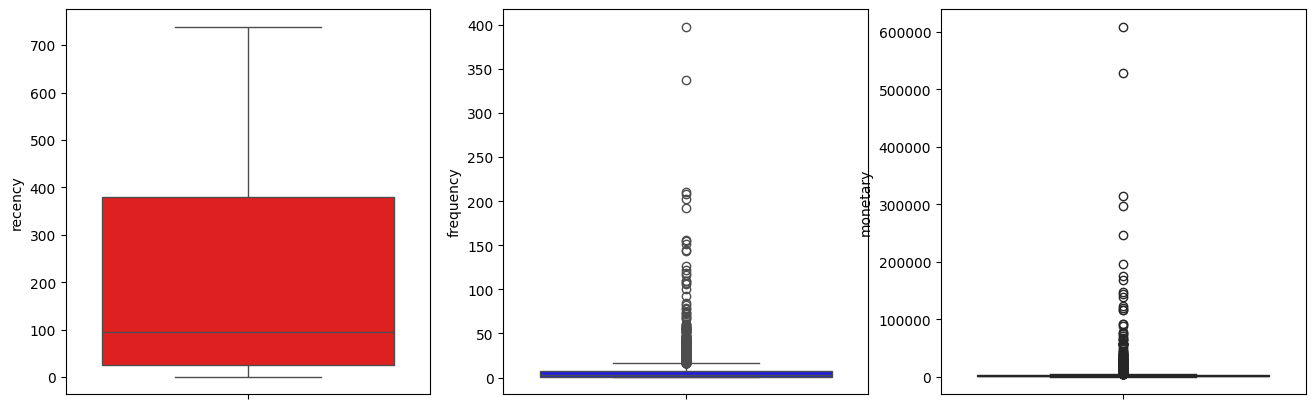

In [24]:
plt.figure(figsize=(16,5))

plt.subplot(131)
sns.boxplot(y='recency', data=df_rfm, palette=['red'])

plt.subplot(132)
sns.boxplot(y='frequency', data=df_rfm, palette=['blue'])

plt.subplot(133)
sns.boxplot(y='monetary', data=df_rfm, palette=['green'])

plt.show()

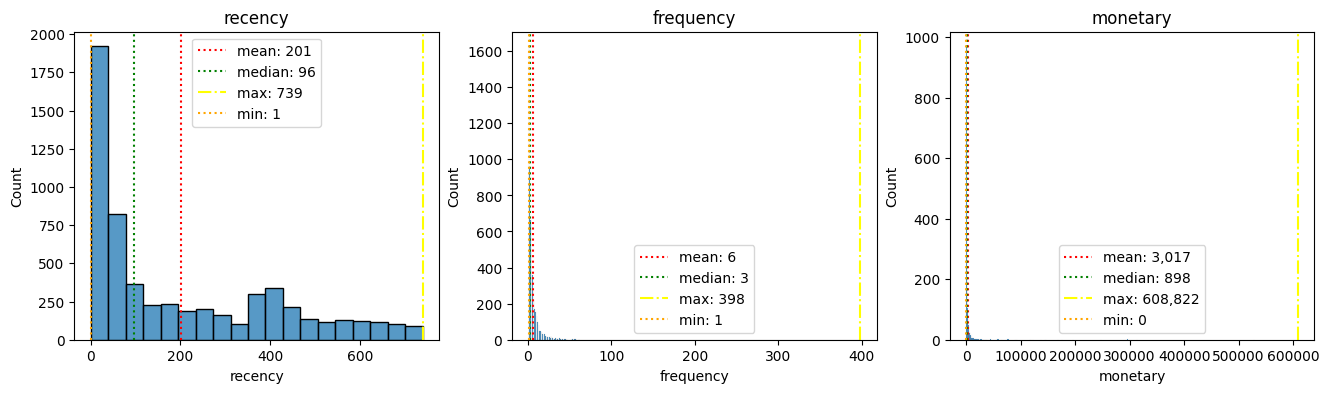

In [25]:
plt.figure(figsize=(16,4))
i = 131
col_to_plot = ['recency', 'frequency', 'monetary']
for col in (col_to_plot):
    plt.subplot(i)
    data = df_rfm[col]
    plt.title(f'{col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

## Scoring of Recency and Frequency Values

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### KMeans Method

In [27]:
df_rfm2 = pd.concat([df_recency, df_freq[['frequency']], df_mon[['monetary']]], axis=1)
df_rfm2['recency_2'] = MinMaxScaler().fit_transform(df_rfm2[['recency']])
df_rfm2['frequency_2'] = MinMaxScaler().fit_transform(df_rfm2[['frequency']])
df_rfm2['monetary_2'] = MinMaxScaler().fit_transform(df_rfm2[['monetary']])

y = KMeans(n_clusters = 5, random_state=1).fit(df_rfm2['recency_2'].to_numpy().reshape(-1, 1))
df_rfm2['recency_score'] = y.labels_
y = KMeans(n_clusters = 5, random_state=1).fit(df_rfm2['frequency_2'].to_numpy().reshape(-1, 1))
df_rfm2['frequency_score'] = y.labels_
y = KMeans(n_clusters = 3, random_state=1).fit(df_rfm2['monetary_2'].to_numpy().reshape(-1, 1))
df_rfm2['monetary_score'] = y.labels_

rec = df_rfm2.sort_values('recency').recency_score.unique()
df_rfm2['recency_score'] = df_rfm2['recency_score'].replace({rec[0]:5,rec[1]:4,rec[2]:3,rec[3]:2,rec[4]:1})
freq = df_rfm2.sort_values('frequency').frequency_score.unique()
df_rfm2['frequency_score'] = df_rfm2['frequency_score'].replace({freq[0]:1,freq[1]:2,freq[2]:3,freq[3]:4,freq[4]:5})
mon = df_rfm2.sort_values('monetary').monetary_score.unique()
df_rfm2['monetary_score'] = df_rfm2['monetary_score'].replace({mon[0]:1,mon[1]:2,mon[2]:3})

df_rfm2.loc[df_rfm2[(df_rfm2['frequency']>1) & (df_rfm2['frequency_score']==1)].index, 'frequency_score'] = 2

df_rfm2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer ID,recency,frequency,monetary,recency_2,frequency_2,monetary_2,recency_score,frequency_score,monetary_score
0,12346.0,326,12,77556.46,0.440379,0.027708,0.127388,3,2,1
1,12347.0,2,8,5633.32,0.001355,0.017632,0.009253,5,2,1
2,12348.0,75,5,2019.40,0.100271,0.010076,0.003317,5,2,1
3,12349.0,19,4,4428.69,0.024390,0.007557,0.007274,5,2,1
4,12350.0,310,1,334.40,0.418699,0.000000,0.000549,3,1,1
...,...,...,...,...,...,...,...,...,...,...
5876,18283.0,4,22,2736.65,0.004065,0.052897,0.004495,5,2,1
5877,18284.0,432,1,461.68,0.584011,0.000000,0.000758,2,1,1
5878,18285.0,661,1,427.00,0.894309,0.000000,0.000701,1,1,1
5879,18286.0,477,2,1296.43,0.644986,0.002519,0.002129,2,2,1


## Customer Segmentation

In [28]:
# Mapping of segments according to recency and frequency scores of customers
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [29]:
df_rfm = pd.concat([df_rfm, df_rfm2[['recency_score','frequency_score','monetary_score']]], axis=1)
df_rfm['segment_rf'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm['segment_rf'] = df_rfm['segment_rf'].replace(seg_map, regex=True)

def segment_mon(x):
    if x==1:
        return 'low'
    elif x==2:
        return 'medium'
    else:
        return 'high'

df_rfm['segment_mon'] = df_rfm['monetary_score'].apply(segment_mon)
df_rfm

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,segment_rf,segment_mon
0,12346.0,326,12,77556.46,3,2,1,About to Sleep,low
1,12347.0,2,8,5633.32,5,2,1,Potential Loyalists,low
2,12348.0,75,5,2019.40,5,2,1,Potential Loyalists,low
3,12349.0,19,4,4428.69,5,2,1,Potential Loyalists,low
4,12350.0,310,1,334.40,3,1,1,About to Sleep,low
...,...,...,...,...,...,...,...,...,...
5876,18283.0,4,22,2736.65,5,2,1,Potential Loyalists,low
5877,18284.0,432,1,461.68,2,1,1,Hibernating,low
5878,18285.0,661,1,427.00,1,1,1,Hibernating,low
5879,18286.0,477,2,1296.43,2,2,1,Hibernating,low


In [30]:
display(df_rfm['segment_rf'].value_counts())
display(df_rfm['segment_mon'].value_counts())

segment_rf
Potential Loyalists    3064
Hibernating            1656
About to Sleep          643
New Customers           342
Promising               150
Champions                20
At Risk                   5
Need Attention            1
Name: count, dtype: int64

segment_mon
low       5863
medium      16
high         2
Name: count, dtype: int64

In [31]:
for i in seg_map.values():
    if i not in df_rfm['segment_rf'].unique().tolist():
        print(i)

Can't Loose
Loyal Customers


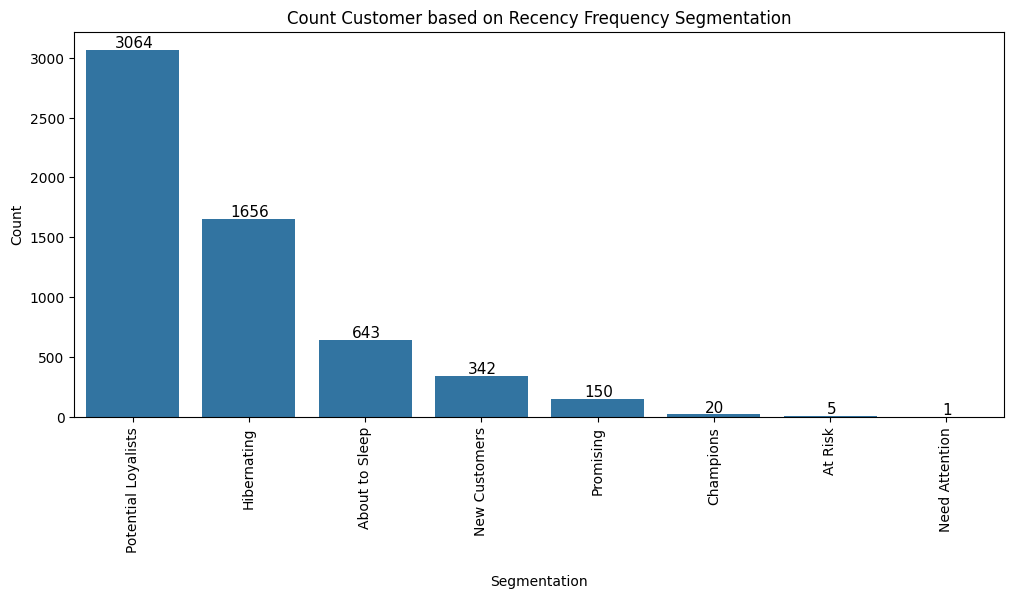

In [32]:
df_plot = df_rfm.copy(deep=True)
a = []
b = df_plot.columns.tolist()
for i in df_plot['segment_rf'].value_counts().index.tolist():
    a.extend(df_plot[df_plot['segment_rf']==i].values)

df_con = pd.DataFrame(columns=b, data=a)

plt.figure(figsize=(12,5))
ax = sns.countplot(x='segment_rf', data=df_con)
plt.title('Count Customer based on Recency Frequency Segmentation')
plt.xlabel('\nSegmentation')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.41, p.get_height()+20), ha="center", fontsize=11)

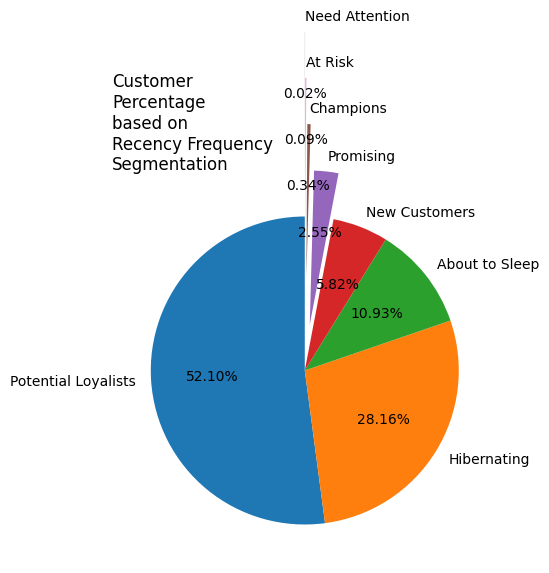

In [33]:
fig = plt.figure(figsize=(12,5))
fig.patch.set_facecolor('xkcd:white')
plt.title('Customer\nPercentage\nbased on\nRecency Frequency\nSegmentation', loc='left')
sizes = df_rfm['segment_rf'].value_counts().values.tolist()
labels = df_rfm['segment_rf'].value_counts().index.tolist()
explode_val = []
val = 0
for i in range(df_rfm['segment_rf'].nunique()):
    if i <= df_rfm['segment_rf'].nunique() - 5:
        explode_val.append(val)
    else:
        val += 0.3
        explode_val.append(val)

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode_val)
plt.show()

<ipython-input-34-702095b7ad50>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='segment_mon', data=df_con, palette=palette)


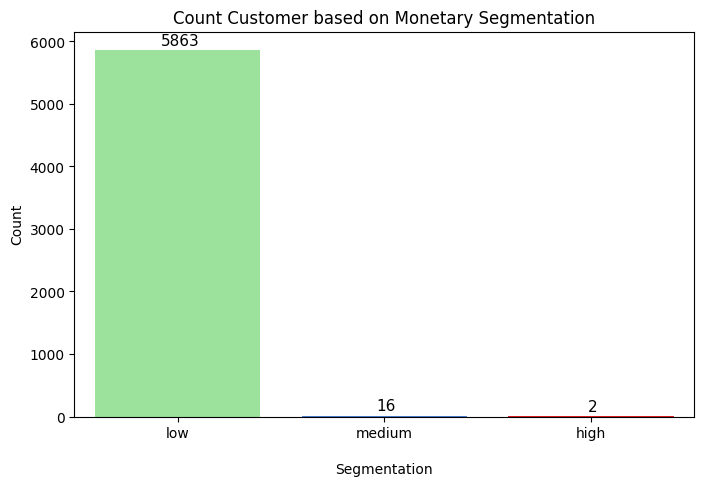

In [34]:
df_plot = df_rfm.copy(deep=True)
a = []
b = df_plot.columns.tolist()
for i in df_plot['segment_mon'].value_counts().index.tolist():
    a.extend(df_plot[df_plot['segment_mon']==i].values)

df_con = pd.DataFrame(columns=b, data=a)

plt.figure(figsize=(8,5))
palette = ['#90EE90','#347aeb','red']
ax = sns.countplot(x='segment_mon', data=df_con, palette=palette)
plt.title('Count Customer based on Monetary Segmentation')
plt.xlabel('\nSegmentation')
plt.ylabel('Count')
# plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.41, p.get_height()+80), ha="center", fontsize=11)

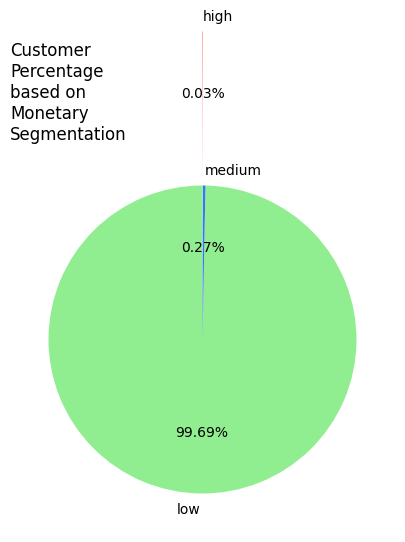

In [35]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('xkcd:white')
plt.title('Customer\nPercentage\nbased on\nMonetary\nSegmentation', loc='left')
sizes = df_rfm['segment_mon'].value_counts().values.tolist()
labels = df_rfm['segment_mon'].value_counts().index.tolist()
explode_val = []
val = 0
for i in range(df_rfm['segment_mon'].nunique()):
    if i < df_rfm['segment_mon'].nunique() - 1:
        explode_val.append(val)
    else:
        val += 1
        explode_val.append(val)

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode_val, colors=palette)
plt.show()

### Recency

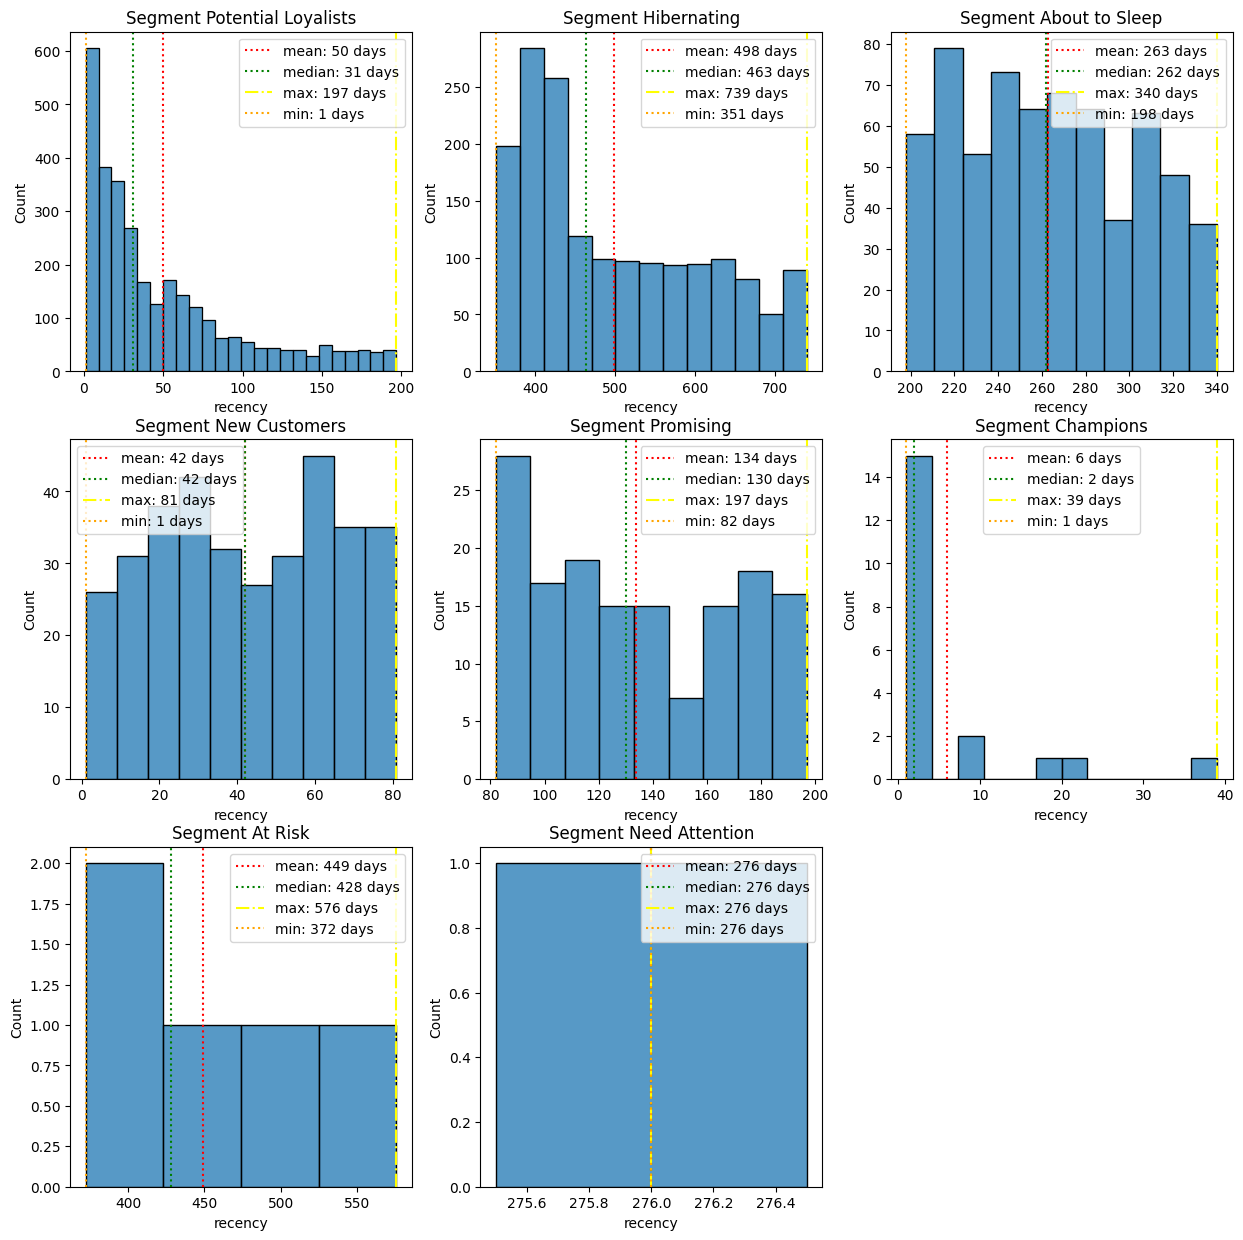

In [36]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_rf'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_rf']==col]['recency']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,} days'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,} days'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,} days'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,} days'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,} days'.format(mini))
    plt.legend(loc='best')
    i += 1

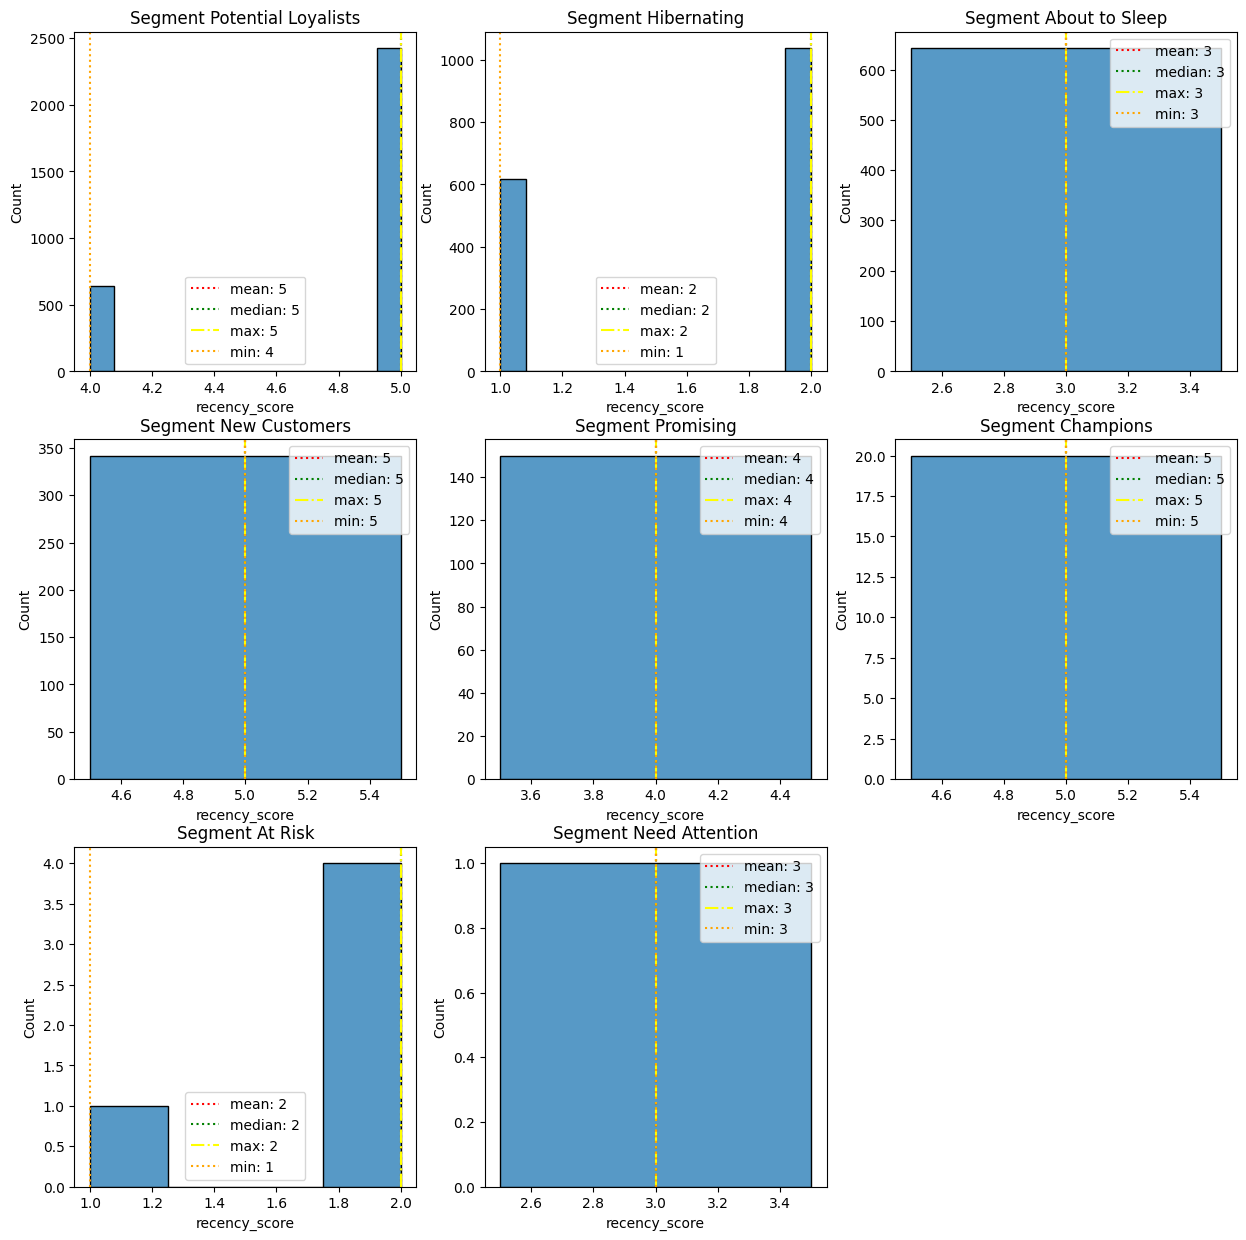

In [37]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_rf'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_rf']==col]['recency_score']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

### Frequency

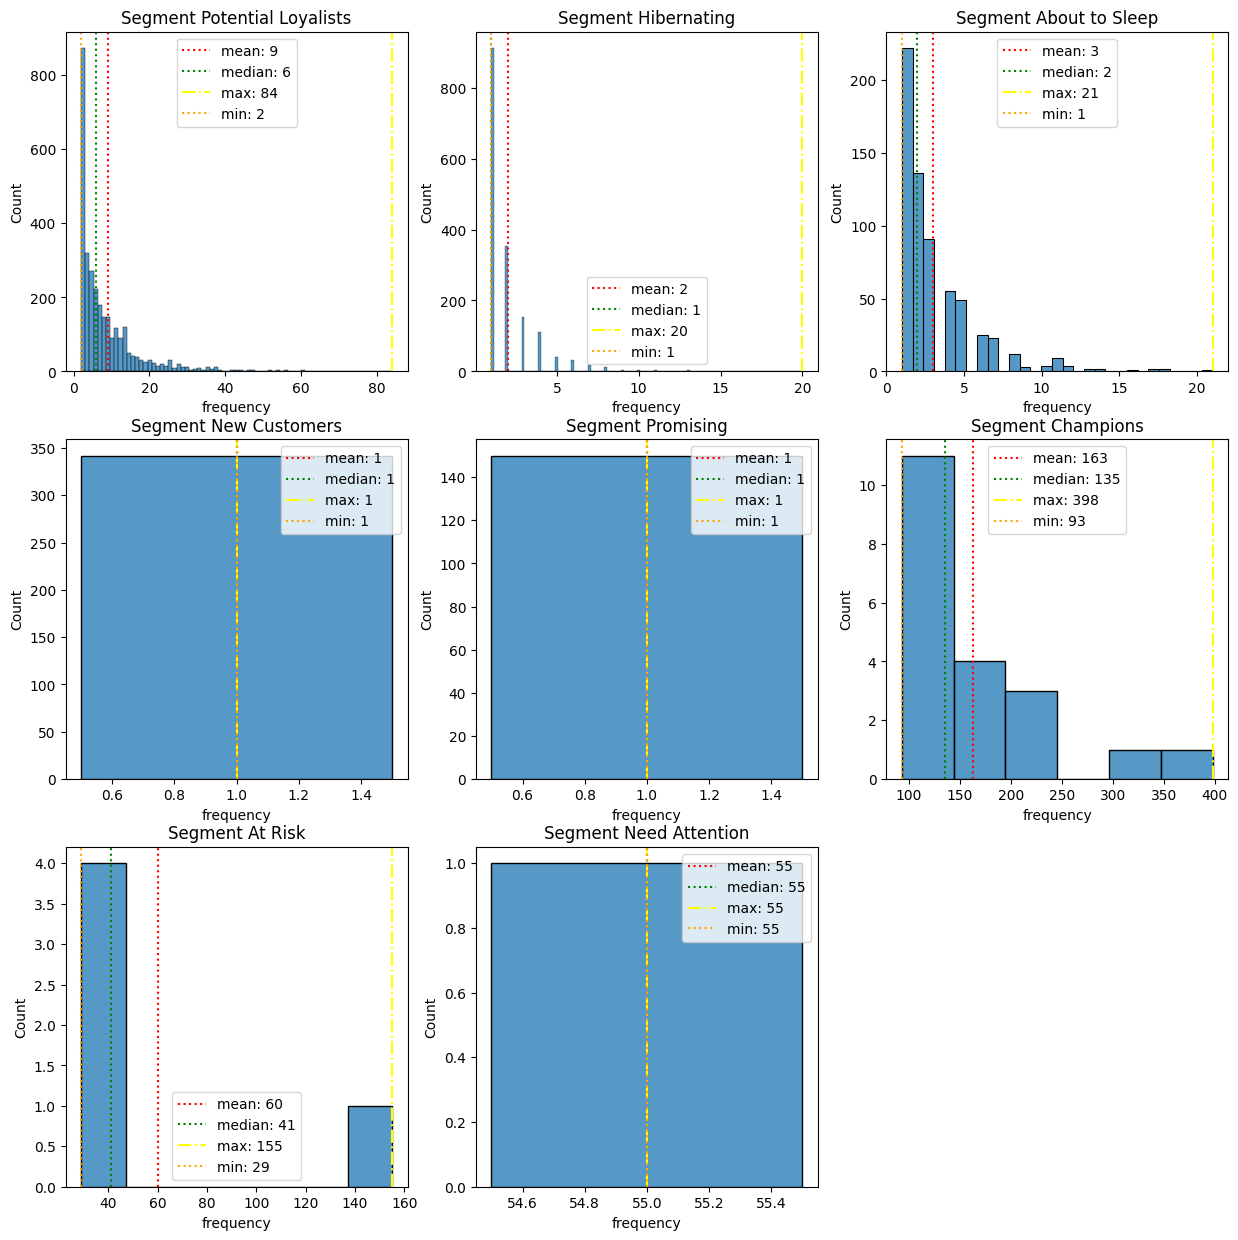

In [38]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_rf'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_rf']==col]['frequency']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

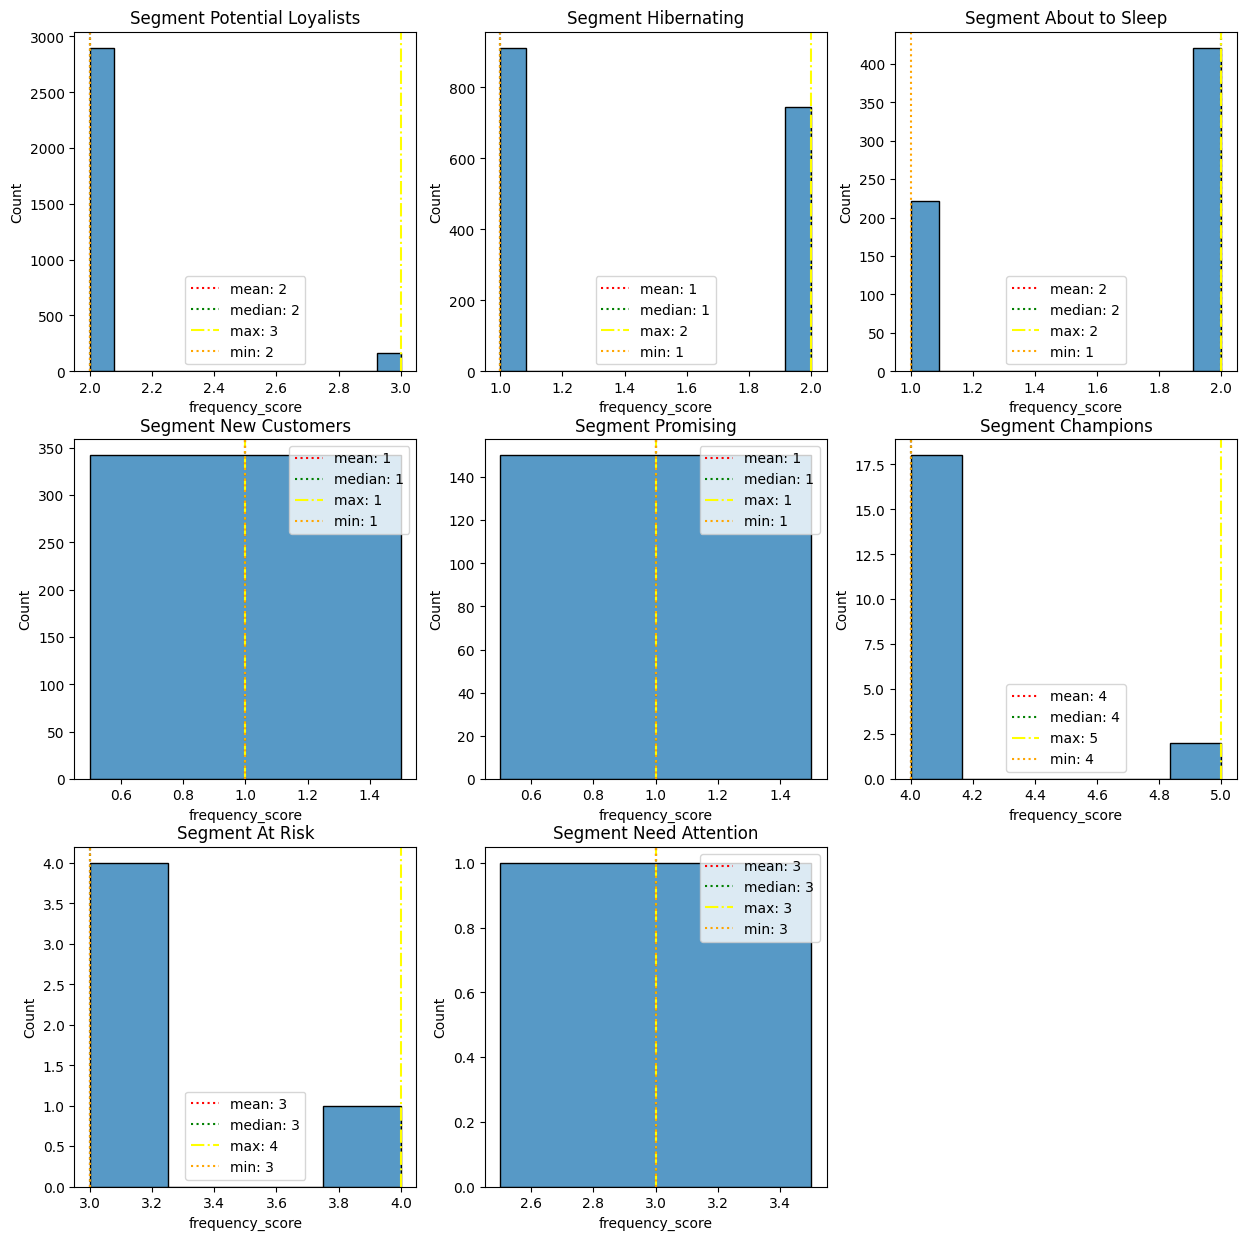

In [39]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_rf'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_rf']==col]['frequency_score']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

### Monetary

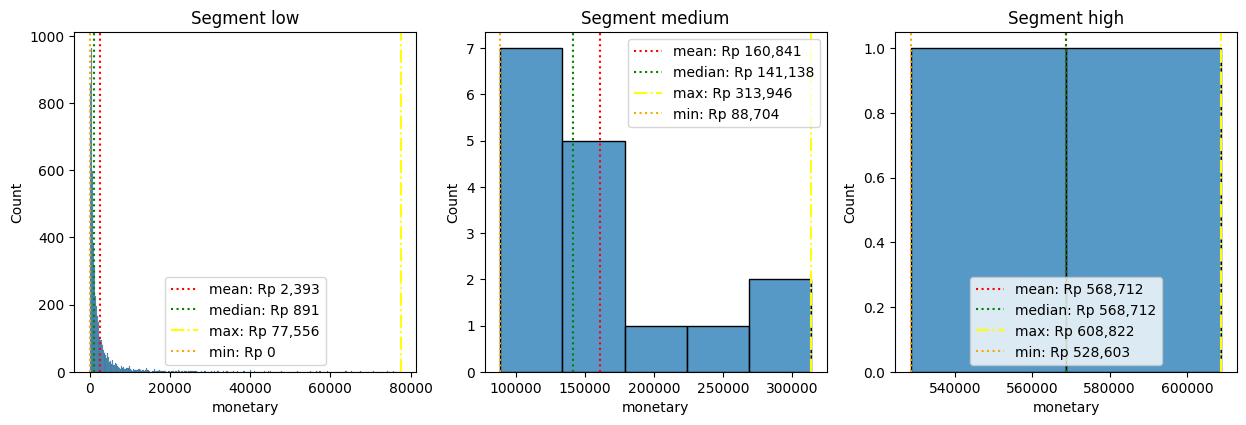

In [40]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_mon'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_mon']==col]['monetary']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: Rp {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: Rp {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: Rp {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: Rp {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: Rp {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

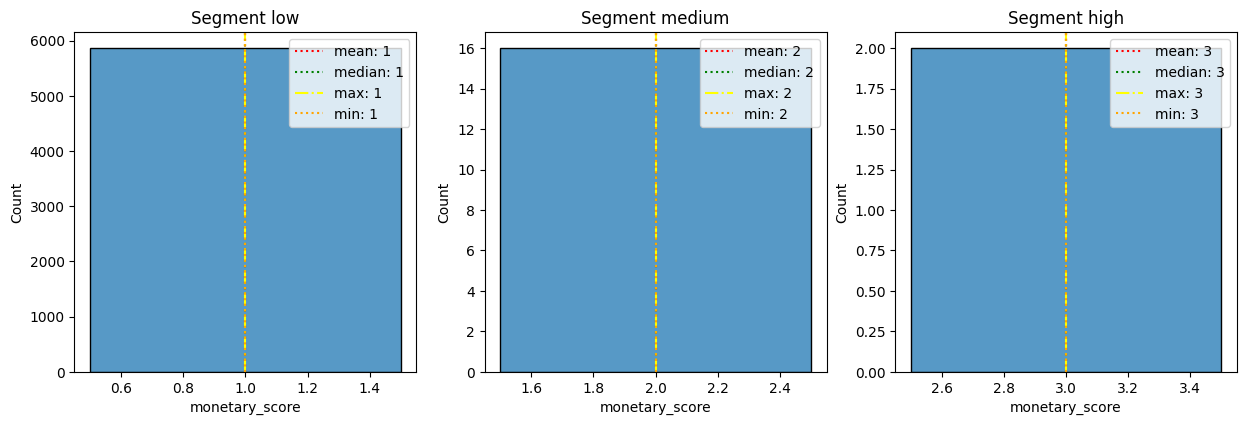

In [41]:
plt.figure(figsize=(15,15))
i = 331
col_to_plot = df_plot['segment_mon'].value_counts().index.tolist()[:9]
for idx,col in enumerate(col_to_plot):
    plt.subplot(i)
    data = df_plot[df_plot['segment_mon']==col]['monetary_score']
    plt.title(f'Segment {col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

In [42]:
df_gb = df_rfm.groupby(['segment_rf','segment_mon'], as_index=False).agg({'Customer ID':'nunique'})
df_gb = df_gb.rename(columns={'Customer ID':'count'})
df_gb

,segment_rf,segment_mon,count
0,About to Sleep,low,643
1,At Risk,low,5
2,Champions,high,2
3,Champions,low,10
4,Champions,medium,8
5,Hibernating,low,1656
6,Need Attention,low,1
7,New Customers,low,342
8,Potential Loyalists,low,3056
9,Potential Loyalists,medium,8


In [43]:
uniq_segment_rf = df_gb['segment_rf'].unique().tolist()
data = []
for seg in uniq_segment_rf:
    sm_list = df_gb[df_gb['segment_rf']==seg]['segment_mon'].tolist()
    if ('high' not in sm_list) and ('low' in sm_list) and ('medium' in sm_list):
        data.extend([[seg, 'high', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    elif ('high' in sm_list) and ('low' not in sm_list) and ('medium' in sm_list):
        data.extend([[seg, 'low', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    elif ('high' in sm_list) and ('low' in sm_list) and ('medium' not in sm_list):
        data.extend([[seg, 'medium', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    elif ('high' in sm_list) and ('low' not in sm_list) and ('medium' not in sm_list):
        data.extend([[seg, 'low', 0]])
        data.extend([[seg, 'medium', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    elif ('high' not in sm_list) and ('low' in sm_list) and ('medium' not in sm_list):
        data.extend([[seg, 'high', 0]])
        data.extend([[seg, 'medium', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    elif ('high' not in sm_list) and ('low' not in sm_list) and ('medium' in sm_list):
        data.extend([[seg, 'high', 0]])
        data.extend([[seg, 'low', 0]])
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
    else:
        data.extend(df_gb[df_gb['segment_rf']==seg].values.tolist())
# data

cols = df_gb.columns.tolist()
df_con = pd.DataFrame(data, columns=cols)
df_con = df_con.sort_values(['segment_rf','segment_mon'], ascending=True).reset_index(drop=True)
df_con

,segment_rf,segment_mon,count
0,About to Sleep,high,0
1,About to Sleep,low,643
2,About to Sleep,medium,0
3,At Risk,high,0
4,At Risk,low,5
5,At Risk,medium,0
6,Champions,high,2
7,Champions,low,10
8,Champions,medium,8
9,Hibernating,high,0


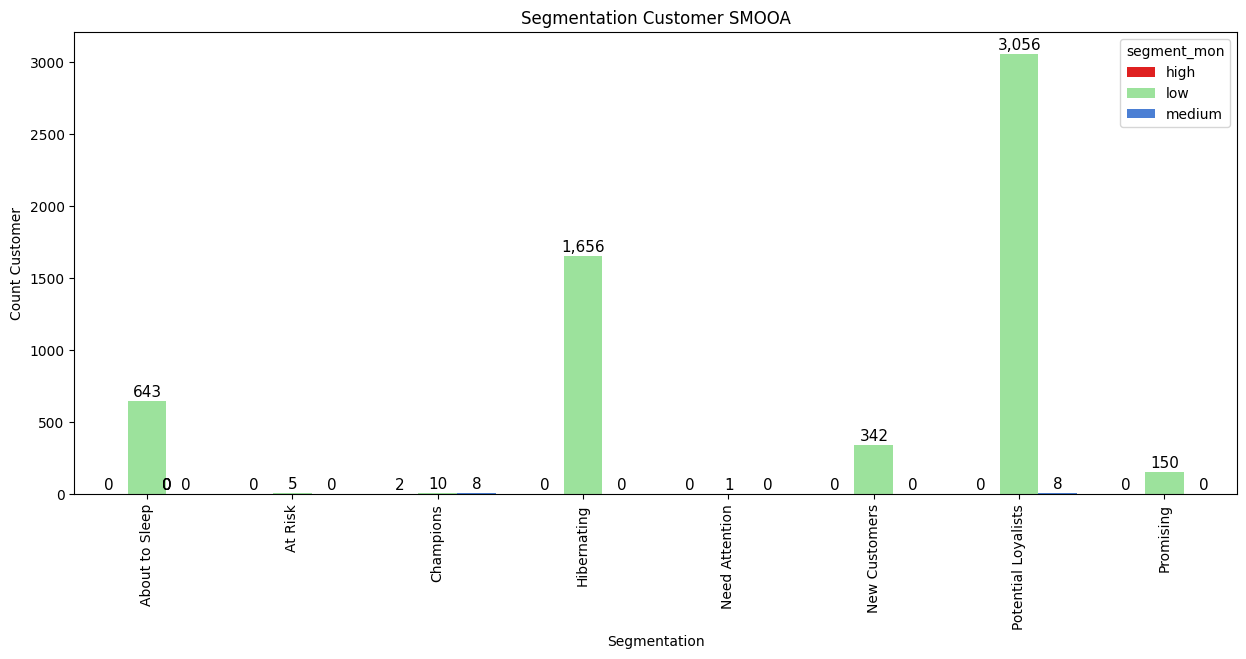

In [44]:
plt.figure(figsize=(15,6))
palette = ['red','#90EE90','#347aeb']
ax = sns.barplot(x='segment_rf', y='count', hue='segment_mon', data=df_con, palette=palette)
# ax = sns.barplot(x='segment_rf', y='count', hue='segment_mon', data=df_con)
plt.title('Segmentation Customer SMOOA')
plt.xlabel('Segmentation')
plt.ylabel('Count Customer')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x()+0.136, p.get_height()+30), ha="center", fontsize=11)